<div align='center'><font size="6" color="#FFA500">Getting started with Dimensionality Reduction Techniques in Python</font></div>

<div align='center'><font size="4" color="#FFA500">A 3 part serieson Dimensionality reduction techniques using the Kannada MNIST dataset</font></div>
<hr>


<p style='text-align:justify'><b>Key Objectives:</b> In this series of notebooks, we shall study about three Dimensionality reduction techniques using the Kannada MNIST dataset. The techniques are PCA, t-SNE and UMAP.</p>


* [Part 1: Visualizing Kannada MNIST with PCA](https://www.kaggle.com/parulpandey/visualizing-kannada-mnist-with-pca)
* [Part 2: Visualizing Kannada MNIST with t-SNE](https://www.kaggle.com/parulpandey/visualizing-kannada-mnist-with-t-sne)
* [Part 3: Visualizing Kannada MNIST with UMAP](https://www.kaggle.com/parulpandey/visualizing-kannada-mnist-with-umap-technique)
<hr>


**This is the last and the final part of the **Dmensionality Reduction Techniques** notebooks  that I have been doing. 
In this motebook, we will explore a new technique called **UMAP** which is a pretty new technique(2018) in the DImensionality Reduction arsenal. We shall also understand how UMAP is a better alternative to t-SNE.

<div align='center'><font size="6" color="#FFA500">Part3: Uniform Manifold Approximation and Projection(UMAP) in Python</font></div>
<hr>

## Table of Contents

* What is UMAP
* UMAP vs t-SNE
* UMAP under the hood
* UMAP with Python
* Further Readings


## UMAP

**[UMAP]([https://umap-learn.readthedocs.io/en/latest/basic_usage.html](https://umap-learn.readthedocs.io/en/latest/basic_usage.html))** or **Uniform Manifold Approximation and Projection** is a general purpose manifold learning and dimension reduction algorithm. UMAP is a nonlinear dimensionality reduction method and is very effective for visualizing clusters or groups of data points and their relative proximities.it is a pretty fast and scalable and can be applied directly to sparse matrices thereby eliminating the need to use `Truncated SVD` as a prior pre-processing step. Leland McInnes, one of the creators of UMAP says that UMAP is an attempt to create something like t-SNE but with stronger mathematical foundations.  

### Paper
I won't go into the mathematical foundations behind UMAP but for a more detailed explanation of the algorithm the paper can be found [here](https://arxiv.org/abs/1802.03426).

### UMAP vs t-SNE
Let's see some of the major points as to why UMAP tends to be the algorithm of choice

* UMAP is faster than t-SNE, a problem we encountered while using t-SNE in the previous notebook where we had to sample the data for this very reason.
* At capturing the global structure of the data, UMAP does a better job than t-SNE.
* UMAP can also be used for preprocessing while t-SNE does't have major use outside visualisation.
* 
## UMAP under the hood

This method uses the concept of k-nearest neighbor and optimizes the results using stochastic gradient descent. The algorithm first calculates the distance between the points in high dimensional space and then projects them onto the low dimensional space. It then calculates the distance between these points again in this low dimensional space followed by using Stochastic Gradient Descent to minimize the difference between these distances.

## UMAP with Python

In [1]:
# Loading necessary libraries

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# For plotting
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/Kannada-MNIST/sample_submission.csv
/kaggle/input/Kannada-MNIST/test.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/train.csv


Reading in the data

In [2]:
train = pd.read_csv('../input/Kannada-MNIST/train.csv')
test = pd.read_csv('../input/Kannada-MNIST/test.csv')


In [3]:
#Setting the label and the feature columns
y = train.loc[:,'label'].values
x = train.loc[:,'pixel0':].values

print(x.shape)
print(y)

(60000, 784)
[0 1 2 ... 7 8 9]


In [4]:
# Subsetting a data for faster execution

x_subset = x[0:10000]
y_subset = y[0:10000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


To use UMAP for this task we need to first construct a UMAP object that will do the job for us. That is as simple as instantiating the class. So let’s import the umap library and do that. Next we shall use the fit_transform method which first calls fit and then returns the transformed data as a numpy array.

In [5]:
import umap
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(x_subset)
embedding.shape

(10000, 2)

Basic UMAP Parameters:
UMAP has several hyperparameters that can have a significant impact on the resulting embedding. ILet's have a brief look at some of them:

-   `n_neighbors`

This parameter controls how UMAP balances local versus global structure in the data. This means low values of n_neighbours forces UMAP to focus on very local structures while the higher values will make UMAP focus on the larger neighbourhoods. Look at the comparison below for various values of n_neighbours.

![enter image description here](https://imgur.com/KLTzQpy.png)
-   `min_dist`

The `min_dist` parameter controls how tightly UMAP is allowed to pack points together.Lower values mean the points will be clustered closely and vice versa.

-   `n_components`

This parameter allows the user to determine the dimensionality of the reduced dimension space.

-   `metric`
This parameter essentially controls how distance is computed in the ambient space of the input data.


## Visualizing UMAP as a scatterplot

we can plot the embedding as a standard scatterplot and color by the target array (

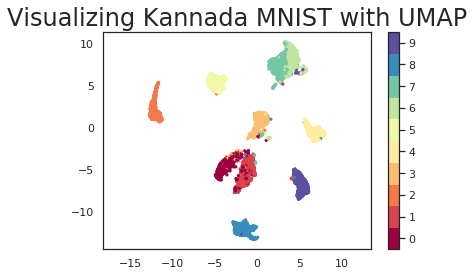

In [6]:
plt.scatter(reducer.embedding_[:, 0], reducer.embedding_[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST with UMAP', fontsize=24);

UMAP has successfully captured the digit classes. Some digit classes blend into one another but aren't so obvious to a human eye. To get a better idea of why UMAP chose to do this it is helpful to see the actual digits involve. One can do this using bokeh and mouseover tooltips of the images.

## Using Bokeh to visualize UMAP

To get a better idea of why UMAP chose to do this it is helpful to see the actual digits involve. One can do this using bokeh and mouseover tooltips of the images.

Source of code : https://umap-learn.readthedocs.io/en/latest/basic_usage.html

In [7]:
# Encoding all the images for inclusion in a dataframe.
from io import BytesIO
from PIL import Image
import base64


def embeddable_image(data):
    img_data = 255 - 15 * data.astype(np.uint8)
    image = Image.fromarray(img_data, mode='L').resize((28,28), Image.BICUBIC)
    buffer = BytesIO()
    image.save(buffer, format='png')
    for_encoding = buffer.getvalue()
    return 'data:image/png;base64,' + base64.b64encode(for_encoding).decode()

# loading up bokeh and other tools to generate a suitable interactive plot.

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper
from bokeh.palettes import Spectral10

output_notebook()

Loading BokehJS ...

In [8]:
# Generating the plot itself with a custom hover tooltip 

x_subset_reshape = x_subset.reshape(10000,28,28)

digits_df = pd.DataFrame(embedding, columns=('x', 'y'))
digits_df['digit'] = [str(x) for x in y_subset]
digits_df['image'] = list(map(embeddable_image, x_subset_reshape))


datasource = ColumnDataSource(digits_df)
color_mapping = CategoricalColorMapper(factors=[str(9 - x) for x in y_subset],
                                       palette=Spectral10)

plot_figure = figure(
    title='UMAP projection of the Kannada MNIST dataset',
    plot_width=600,
    plot_height=600,
    tools=('pan, wheel_zoom, reset')
)

plot_figure.add_tools(HoverTool(tooltips="""
<div>
    <div>
        <img src='@image' style='float: left; margin: 5px 5px 5px 5px'/>
    </div>
    <div>
        <span style='font-size: 16px; color: #224499'>Digit:</span>
        <span style='font-size: 18px'>@digit</span>
    </div>
</div>
"""))

plot_figure.circle(
    'x',
    'y',
    source=datasource,
    color=dict(field='digit', transform=color_mapping),
    line_alpha=0.6,
    fill_alpha=0.6,
    size=4
)
show(plot_figure)

## Comparison of Dimension Reduction Techniques
Here is a comparison of the three different Dimensionality reduction techniques using Kannada MNIST dataset.

![](https://imgur.com/iMjNF0Q.png)


We can see that the UMAP does a great job in separating digits as compared to t-SNE or PCA. As mentioned in UMAP’s GitHub repository, it often performs better at preserving aspects of the global structure of the data than t-SNE. This means that it can often provide a better “big picture” view of the data as well as preserving local neighbor relations.

## Using UMAP technique to understand data

We shall now examine how a Word2Vec model that has been trained to work with text, groups the meanings of words. It will be interesting to see these groupings since they will reveal a lot about the relationships between the words. 

[Wikipedia](https://en.wikipedia.org/wiki/Word2vec) describes Word2vec as a group of related models that are used to produce [word embeddings](https://en.wikipedia.org/wiki/Word_embedding). Word2vec takes as its input a large [corpus of text](https://en.wikipedia.org/wiki/Text_corpus) and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space.

![](https://imgur.com/kM4rg2D.png)

Notice how similar meaning words appear together and can be easily visualised.

The projection has been created using the [Embedding projector](http://projector.tensorflow.org/) tool. You can read more about the tool [here](https://towardsdatascience.com/visualizing-bias-in-data-using-embedding-projector-649bc65e7487)